<a href="https://colab.research.google.com/github/samapatil1729/Projects/blob/main/Major_project_DS_03_BSP3_SKP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name: Data Science March MAJOR Project**

### **PROJECT DESCRIPTION :**

**Problem statement**: Create a classification model to predict whether a person makes over $50k a year

**Context:** This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

**Dataset :**
https://drive.google.com/file/d/1-ucF_5-pIYJksad3PCHBOctoN0HXAvm4/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
path = "/content/drive/MyDrive/SmartKnower_major project/adult.csv"
df = pd.read_csv(path) # Reading file by replacing '?' with 'NaN'
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
#Assigning the column names
df.columns = ['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation',
              'relationship','race','sex','capital_gain','capital_loss','hours_per_week',
              'native_country','income']
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
#checking the missing values/'?' in each column
for col in df.columns:
  print('column_name: ', col)
  print(df[col].value_counts())

column_name:  Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
column_name:  Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
column_name:  Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
column_name:  Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th  

In [9]:
#replacing '?' with NaN
df = df.replace('[?]', np.NaN, regex=True)

In [10]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [15]:
#Checking null Values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [17]:
df.shape

(32560, 15)

In [18]:
df.dropna(inplace = True) # deleting rows with NaN values


In [19]:
df.shape

(30161, 15)

In [20]:
df.isnull().sum() # checking the null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:
df.dtypes # chaking the datatype of each column

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [22]:
# Transforming the Object data type in to int

lb = LabelEncoder()  
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['marital_status'] = lb.fit_transform(df['marital_status'])
df['occupation'] = lb.fit_transform(df['occupation'])
df['race'] = lb.fit_transform(df['race'])
df['sex'] = lb.fit_transform(df['sex'])
df['native_country'] = lb.fit_transform(df['native_country'])
df['income'] = lb.fit_transform(df['income'])
df['Education'] = lb.fit_transform(df['Education'])
df['relationship'] = lb.fit_transform(df['relationship'])

In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [24]:
df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

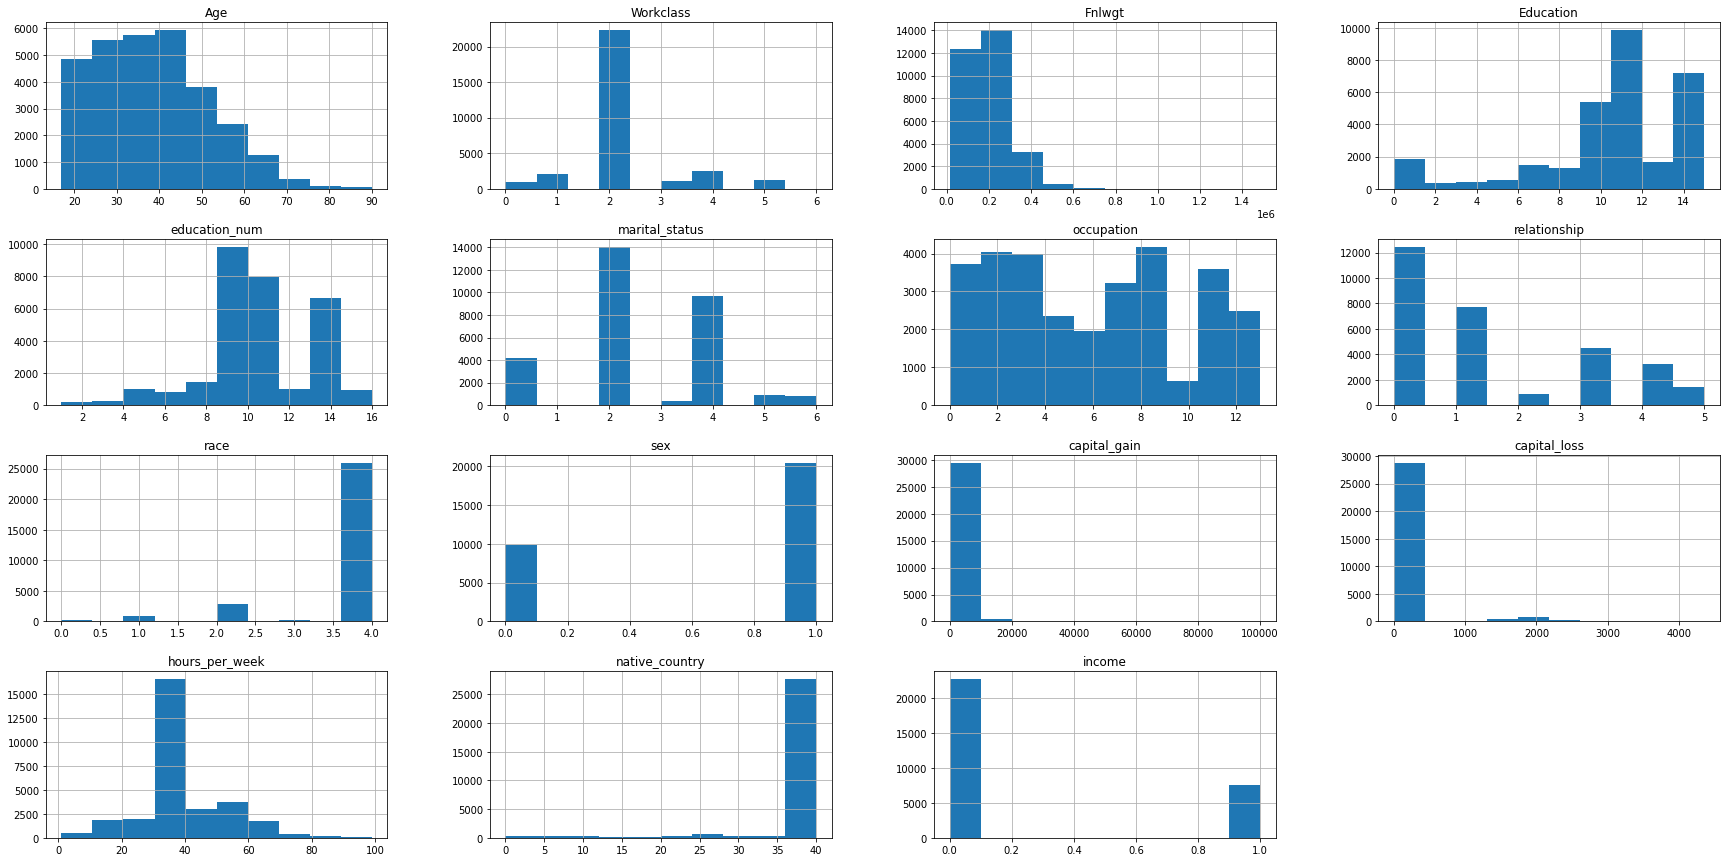

In [27]:
df.hist(figsize=(30,15))
plt.show()

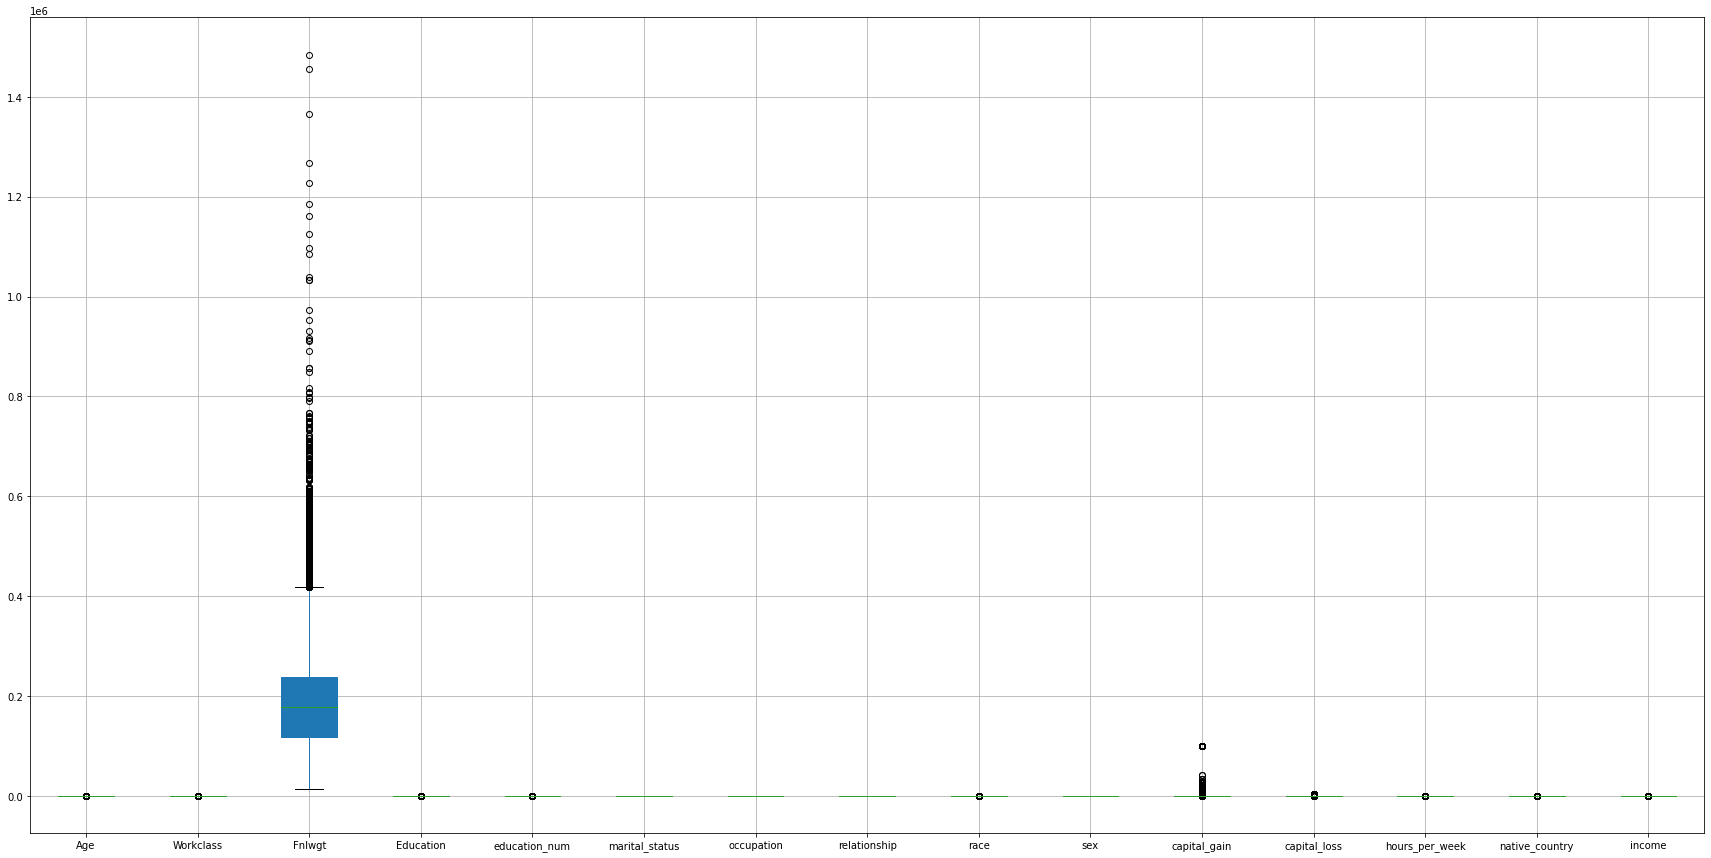

In [28]:
df.boxplot(figsize=(30,15), patch_artist=True)
plt.show()

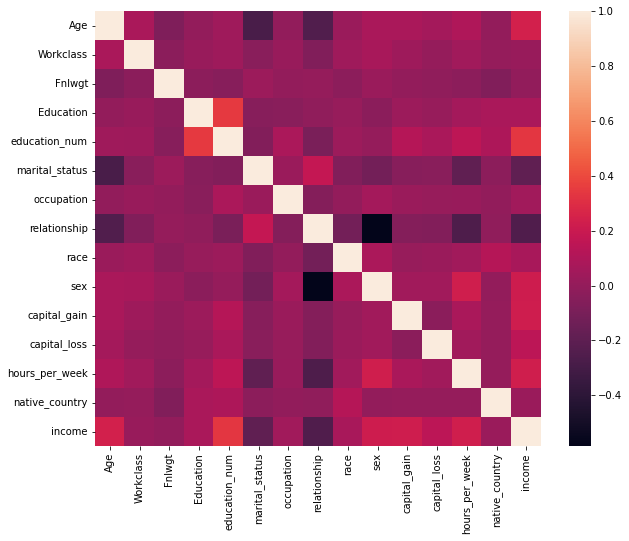

In [162]:
plt.subplots(figsize=(10,8)) # checking the correlation between variables
sns.heatmap(df.corr())

In [132]:
#droping the column with less importance
x = df.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,13]]
y = df.iloc [:,-1]
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [133]:
x.head()

,Age,Workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,4,13,2,3,0,4,1,0,0,13,38
1,38,2,9,0,5,1,4,1,0,0,40,38
2,53,2,7,2,5,0,2,1,0,0,40,38
3,28,2,13,2,9,5,2,0,0,0,40,4
4,37,2,14,2,3,5,4,0,0,0,40,38


In [31]:
# Spliting the data in to traning and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)  
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24128, 12)
(6033, 12)
(24128,)
(6033,)


### **Applying the following classifier models on training dataset and generating predictions for the test dataset**

1.Decision Tree Classifier

2.Random Forest Classifier

3.KNN Classifier

4.SVM Classifier

5.Logistic Regression

### **Also Computing confusion_matrix and classification _report for each of these models and validating the result for precision,recall,F1_score and accuracy for each model based on values from confusion_matrix and classification_report,Also Generating the percentage of missclassification for each models.**

In [134]:
# Defining the function for appling model and getting confusion metrix, classification report
def apply_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification_Report\n',classification_report(y_test,ypred))

# **Decision Tree Classifier**

In [135]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=5, random_state = 1729)
apply_model(m1,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8580901856763926
Testing Score 0.857947952925576
Confusion Matrix
 [[4346  215]
 [ 642  830]]
Classification_Report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4561
           1       0.79      0.56      0.66      1472

    accuracy                           0.86      6033
   macro avg       0.83      0.76      0.78      6033
weighted avg       0.85      0.86      0.85      6033



###**Validate the result for Precision, Recall, F1-score and Accuracy**

In [136]:
#TP=4346 FN= 215
#FP=642 TN=830
# Pre - TP/(TP+FP), TN/(TN+FN)
# Rec - TP/(TP+FN), TN/(TN+FP)
# F1-score = (2*Pre*Rec)/(Pre + Rec)

In [137]:
pre0 = 4346/(4346+642)
pre1 = 830/(830+215)
rec0 = 4346/(4346+215)
rec1 = 830/(830+642)
print('Pre0',pre0)
print('Pre1',pre1)
print('Rec0',rec0)
print('Rec1',rec1)

Pre0 0.8712910986367282
Pre1 0.7942583732057417
Rec0 0.952861214645911
Rec1 0.563858695652174


In [138]:
f1s0 = (2*pre0*rec0)/(pre0+rec0)
f1s1 = (2*pre1*rec1)/(pre1+rec1)
print('F1-score0',f1s0)
print('F1-score1',f1s1)

F1-score0 0.9102523824484239
F1-score1 0.6595152959872865


In [139]:
#accuracy=(TP+TN)/(TP+FN+FP+TN)
acc = (4346+830)/(4346+215+642+830)
print('Accuracy',acc)

Accuracy 0.857947952925576


### **percentage of misclassification**

In [140]:
misc_per = (215+642)*100/(4346+215+642+830)
misc_per

14.2052047074424

# **Random Forest Classifier**

In [141]:
m2 = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
apply_model(m2,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8745026525198939
Testing Score 0.8627548483341622
Confusion Matrix
 [[4330  231]
 [ 597  875]]
Classification_Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4561
           1       0.79      0.59      0.68      1472

    accuracy                           0.86      6033
   macro avg       0.83      0.77      0.80      6033
weighted avg       0.86      0.86      0.86      6033



In [142]:
#TP=4328 FN= 233
#FP=581 TN=891
# Pre - TP/(TP+FP), TN/(TN+FN)
# Rec - TP/(TP+FN), TN/(TN+FP)
# F1-score = (2*Pre*Rec)/(Pre + Rec)

In [143]:
pre0 = 4328/(4328+581)
pre1 = 891/(891+233)
rec0 = 4328/(4328+233)
rec1 = 891/(891+581)
print('Pre0',pre0)
print('Pre1',pre1)
print('Rec0',rec0)
print('Rec1',rec1)

Pre0 0.8816459564066002
Pre1 0.7927046263345195
Rec0 0.9489147116860338
Rec1 0.6052989130434783


In [144]:
f1s0 = (2*pre0*rec0)/(pre0+rec0)
f1s1 = (2*pre1*rec1)/(pre1+rec1)
print('F1-score0',f1s0)
print('F1-score1',f1s1)

F1-score0 0.9140443505807816
F1-score1 0.6864406779661016


In [145]:
#accuracy=(TP+TN)/(TP+FN+FP+TN)
acc = (4328+891)/(4328+891+233+581)
print('Accuracy',acc)

Accuracy 0.8650754185314106


In [146]:
misc_per = (233+581)/(4328+891+233+581)
misc_per

0.13492458146858943

# **Logistic Regression**

In [147]:
m3 = LogisticRegression(penalty='l1',solver='liblinear', max_iter=250, tol=0.0001, C=0.5, warm_start=True, random_state=42)
apply_model(m3,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8190898541114059
Testing Score 0.8252942151500083
Confusion Matrix
 [[4294  267]
 [ 787  685]]
Classification_Report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4561
           1       0.72      0.47      0.57      1472

    accuracy                           0.83      6033
   macro avg       0.78      0.70      0.73      6033
weighted avg       0.81      0.83      0.81      6033



In [148]:
#TP=4294 FN= 267
#FP=787 TN=685
# Pre - TP/(TP+FP), TN/(TN+FN)
# Rec - TP/(TP+FN), TN/(TN+FP)
# F1-score = (2*Pre*Rec)/(Pre + Rec)

In [149]:
pre0 = 4294/(4294+787)
pre1 = 685/(685+267)
rec0 = 4294/(4294+267)
rec1 = 685/(685+787)
print('Pre0',pre0)
print('Pre1',pre1)
print('Rec0',rec0)
print('Rec1',rec1)

Pre0 0.8451092304664436
Pre1 0.7195378151260504
Rec0 0.9414602060951546
Rec1 0.46535326086956524


In [150]:
f1s0 = (2*pre0*rec0)/(pre0+rec0)
f1s1 = (2*pre1*rec1)/(pre1+rec1)
print('F1-score0',f1s0)
print('F1-score1',f1s1)

F1-score0 0.8906865795478116
F1-score1 0.5651815181518152


In [151]:
#accuracy=(TP+TN)/(TP+FN+FP+TN)
acc = (4294+685)/(4294+685+267+787)
print('Accuracy',acc)

Accuracy 0.8252942151500083


In [152]:
misc_per = (267+787)*100/(4294+685+267+787)
misc_per

17.470578484999173

In [153]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [154]:
m3 = LogisticRegression(penalty='l1',solver='liblinear', max_iter=500)
pipe = make_pipeline(StandardScaler(), m3)
apply_model(pipe,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8193385278514589
Testing Score 0.8282778054036135
Confusion Matrix
 [[4291  270]
 [ 766  706]]
Classification_Report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4561
           1       0.72      0.48      0.58      1472

    accuracy                           0.83      6033
   macro avg       0.79      0.71      0.73      6033
weighted avg       0.82      0.83      0.82      6033



# **KNN Classifier**

In [155]:
m4 = KNeighborsClassifier(n_neighbors=25)
apply_model(m4,x_train,x_test,y_train,y_test)

Predictions
 [0 0 0 ... 0 0 0]
Training Score 0.8540285145888594
Testing Score 0.8481684070943146
Confusion Matrix
 [[4217  344]
 [ 572  900]]
Classification_Report
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4561
           1       0.72      0.61      0.66      1472

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [156]:
#TP=4217 FN= 344
#FP=572 TN=900
# Pre - TP/(TP+FP), TN/(TN+FN)
# Rec - TP/(TP+FN), TN/(TN+FP)
# F1-score = (2*Pre*Rec)/(Pre + Rec)

In [157]:
pre0 = 4217/(4217+572)
pre1 = 900/(900+344)
rec0 = 4217/(4217+344)
rec1 = 900/(900+572)
print('Pre0',pre0)
print('Pre1',pre1)
print('Rec0',rec0)
print('Rec1',rec1)

Pre0 0.8805596157861767
Pre1 0.7234726688102894
Rec0 0.9245779434334576
Rec1 0.6114130434782609


In [158]:
f1s0 = (2*pre0*rec0)/(pre0+rec0)
f1s1 = (2*pre1*rec1)/(pre1+rec1)
print('F1-score0',f1s0)
print('F1-score1',f1s1)

F1-score0 0.9020320855614973
F1-score1 0.6627393225331369


In [159]:
#accuracy=(TP+TN)/(TP+FN+FP+TN)
acc = (4217+900)/(4217+900+572+344)
print('Accuracy',acc)

Accuracy 0.8481684070943146


In [160]:
misc_per = (572+344)*100/(4217+900+572+344)
misc_per

15.18315929056854